# Scales in matplotlib

Comparing various defined and custom scales

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## pre-defined scales in matplotlib

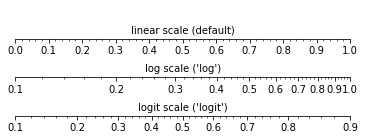

In [6]:
fig = plt.figure(figsize=(6, 2))

# Linear axis
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 1, xlim=[0, 1], ylim=[0, 1])
ax.text(
    0.5,
    0.1,
    "linear scale (default)",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.tick_params(axis="both", which="major")


# Log axis
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 2, xlim=[0.1, 1.0], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "log scale ('log')",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_xscale("log")
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())

# Logit axis
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 3, xlim=[0.1, 0.9], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "logit scale ('logit')",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_xscale("logit")
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter());

**Warning:** in the figure above, the axes limits are not corresponding to one another.

Let's explore the scales a bit more:

## Symlog

Text(0, 0.5, 'symlog both')

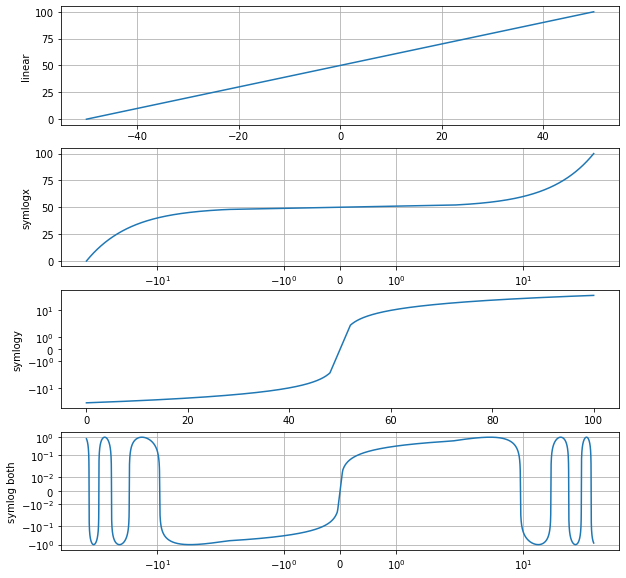

In [3]:
dt = 0.01
x = np.arange(-50.0, 50.0, dt)
y = np.arange(0, 100.0, dt)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(10,10),nrows=4)
ax0.plot(x, y)
ax0.set_ylabel('linear')
ax0.grid()
ax0.xaxis.grid(which='minor')

ax1.plot(x, y)
ax1.set_xscale('symlog')
ax1.set_ylabel('symlogx')
ax1.grid()
ax1.xaxis.grid(which='minor')  # minor grid on too

ax2.plot(y, x)
ax2.set_yscale('symlog')
ax2.set_ylabel('symlogy')

ax3.plot(x, np.sin(x / 3.0))
ax3.set_xscale('symlog')
ax3.set_yscale('symlog', linthresh=0.015)
ax3.grid()
ax3.set_ylabel('symlog both');

## Logit

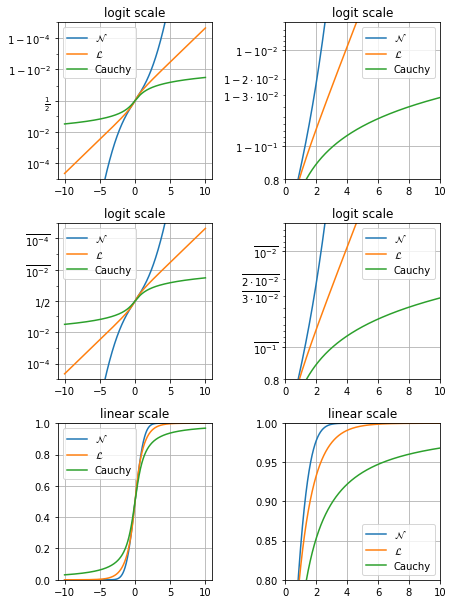

In [4]:
xmax = 10
x = np.linspace(-xmax, xmax, 10000)
cdf_norm = [math.erf(w / np.sqrt(2)) / 2 + 1 / 2 for w in x]
cdf_laplacian = np.where(x < 0, 1 / 2 * np.exp(x), 1 - 1 / 2 * np.exp(-x))
cdf_cauchy = np.arctan(x) / np.pi + 1 / 2

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(6.4, 8.5))

# Common part, for the example, we will do the same plots on all graphs
for i in range(3):
    for j in range(2):
        axs[i, j].plot(x, cdf_norm, label=r"$\mathcal{N}$")
        axs[i, j].plot(x, cdf_laplacian, label=r"$\mathcal{L}$")
        axs[i, j].plot(x, cdf_cauchy, label="Cauchy")
        axs[i, j].legend()
        axs[i, j].grid()

# First line, logitscale, with standard notation
axs[0, 0].set(title="logit scale")
axs[0, 0].set_yscale("logit")
axs[0, 0].set_ylim(1e-5, 1 - 1e-5)

axs[0, 1].set(title="logit scale")
axs[0, 1].set_yscale("logit")
axs[0, 1].set_xlim(0, xmax)
axs[0, 1].set_ylim(0.8, 1 - 5e-3)

# Second line, logitscale, with survival notation (with `use_overline`), and
# other format display 1/2
axs[1, 0].set(title="logit scale")
axs[1, 0].set_yscale("logit", one_half="1/2", use_overline=True)
axs[1, 0].set_ylim(1e-5, 1 - 1e-5)

axs[1, 1].set(title="logit scale")
axs[1, 1].set_yscale("logit", one_half="1/2", use_overline=True)
axs[1, 1].set_xlim(0, xmax)
axs[1, 1].set_ylim(0.8, 1 - 5e-3)

# Third line, linear scale
axs[2, 0].set(title="linear scale")
axs[2, 0].set_ylim(0, 1)

axs[2, 1].set(title="linear scale")
axs[2, 1].set_xlim(0, xmax)
axs[2, 1].set_ylim(0.8, 1)

fig.tight_layout()


## Custom scales

You have to provide both the forward and inverse function that allows to transform your data.

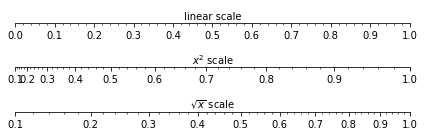

In [5]:
fig = plt.figure(figsize=(6, 2))

# Linear axis
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 1, xlim=[0.0, 1.0], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "linear scale",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.tick_params(axis="both", which="major")


def forward(x):
    return x ** 2


def inverse(x):
    return x ** (1 / 2)


# x**2 scale
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 2, xlim=[0.1, 1.0], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "$x^2$ scale",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_xscale("function", functions=(forward, inverse))
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())

# sqrt(x)
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 3, xlim=[0.1, 1.0], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "$\sqrt{x}$ scale",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_xscale("function", functions=(inverse, forward))
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())

plt.tight_layout()